In [1]:
%pylab inline
import numpy as np
import tensorflow as tf
import cmasher as cmr
from chainconsumer import ChainConsumer

Populating the interactive namespace from numpy and matplotlib


### Load data

In [2]:
ps = stack(np.load('/global/homes/d/dlan/DifferentiableHOS/notebooks/Cls.npy'), axis=0)
pcounts=stack(np.load('/global/homes/d/dlan/DifferentiableHOS/notebooks/Peaks.npy'), axis=0)
ps_jac=stack(np.load('/global/homes/d/dlan/DifferentiableHOS/notebooks/jac_cls.npy'), axis=0)
pcounts_jac=stack(np.load('/global/homes/d/dlan/DifferentiableHOS/notebooks/jac_peaks.npy'), axis=0)
ell=np.load('/global/homes/d/dlan/DifferentiableHOS/notebooks/ell.npy')
ratio=np.load('/global/homes/d/dlan/DifferentiableHOS/notebooks/ratio.npy')
bins=np.load('/global/homes/d/dlan/DifferentiableHOS/notebooks/bin.npy')

##### Compute the mean of the summary 

In [3]:
mups=ps.mean(axis=0)
mupcounts=pcounts.mean(axis=0)

### Computing covariance matrix

In [4]:

f_sky=25/15_000


cov_ps=np.cov(tf.reshape(ps,[len(ps),11]), rowvar=False)*f_sky
fac_ps=np.sqrt(np.diag(cov_ps))

cov_pcounts=np.cov(tf.reshape(pcounts,[len(pcounts),24]), rowvar=False)*f_sky


dmu_ps = ps_jac.mean(axis=0)
dmu_pcounts = tf.reshape(pcounts_jac,[len(pcounts_jac),24,7]).numpy().mean(axis=0)


2022-11-07 05:50:23.743864: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-07 05:50:24.233203: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38280 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:c3:00.0, compute capability: 8.0


## Validate the stability of the Fisher contours for $C_{\ell}$

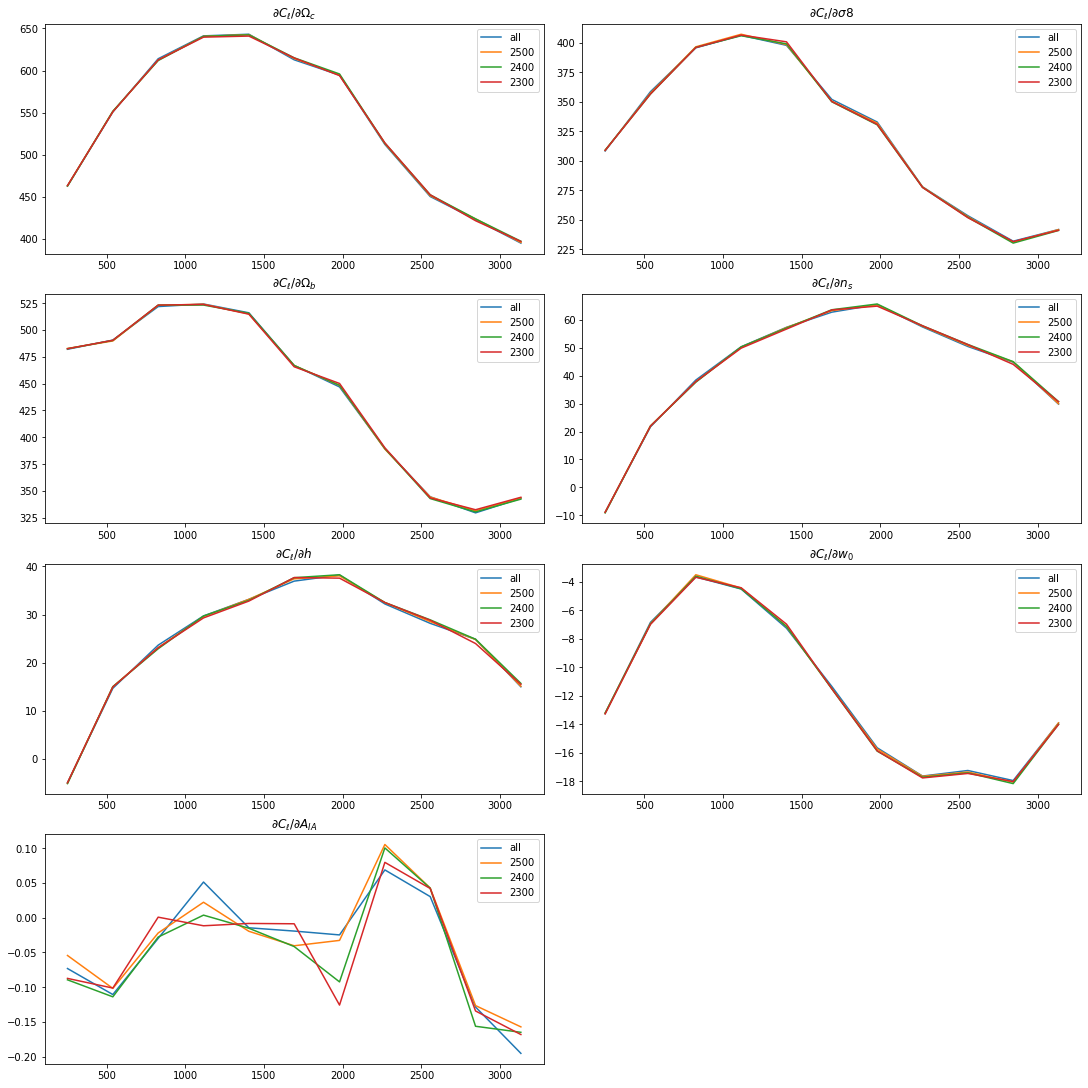

In [5]:
labels=["$\Omega_c$","$\sigma8$","$\Omega_b$","$n_s$","$h$","$w_0$","$A_{IA}$"]
figsize = (15, 15)
fig =plt.figure(figsize=figsize, constrained_layout=True)
cols = 2
rows =4
ax = fig.subplots(rows, cols)
for j in range(7):
    ax.flatten()[j].plot(ell,ps_jac[:,:,:].mean(axis=0)[...,j]/fac_ps,label='all')
    ax.flatten()[j].plot(ell,ps_jac[:2500,:,:].mean(axis=0)[...,j]/fac_ps,label='2500')
    ax.flatten()[j].plot(ell,ps_jac[:2400,:,:].mean(axis=0)[...,j]/fac_ps,label='2400')
    ax.flatten()[j].plot(ell,ps_jac[:2300,:,:].mean(axis=0)[...,j]/fac_ps,label='2300')
    ax.flatten()[j].set_title('$\partial C_\ell/\partial$' +str(labels[j]))
    ax.flatten()[j].legend()
    # Hide x labels and tick labels for top plots and y ticks for right plots.
    #ax.flatten()[j].label_outer()
for i in range(7,8):
    ax.flatten()[i].remove()

In [6]:





#2600
dmu_6 = ps_jac[:2600,:,:].mean(axis=0)
Fp_6 = dmu_6.T @ (np.linalg.inv(cov_ps)) @ dmu_6

#2500
dmu_5 = ps_jac[:2500,:,:].mean(axis=0)
Fp_5 = dmu_5.T @ (np.linalg.inv(cov_ps)) @ dmu_5

#2400
dmu_4 = ps_jac[:2400,:,:].mean(axis=0)
Fp_4 = dmu_4.T @ (np.linalg.inv(cov_ps)) @ dmu_4

#2300
dmu_3 =ps_jac[:2300,:,:].mean(axis=0)
Fp_3 = dmu_3.T @ (np.linalg.inv(cov_ps)) @ dmu_3


#2200
dmu_2 = ps_jac[:2200,:,:].mean(axis=0)
Fp_2 = dmu_2.T @ (np.linalg.inv(cov_ps)) @ dmu_2


#2100
dmu_1 = ps_jac[:2100,:,:].mean(axis=0)
Fp_1 = dmu_1.T @ (np.linalg.inv(cov_ps)) @ dmu_1




In [7]:
col = cmr.tropical
fid_params=np.array([0.2589, 0.8159, 0.04860, 0.9667, 0.6774, -1.0, 0. ])
para_names=["$\Omega_c$", "$\sigma_8$","$\Omega_b$","$n_s$","$h$","$w_0$", "$A_{IA}$"]

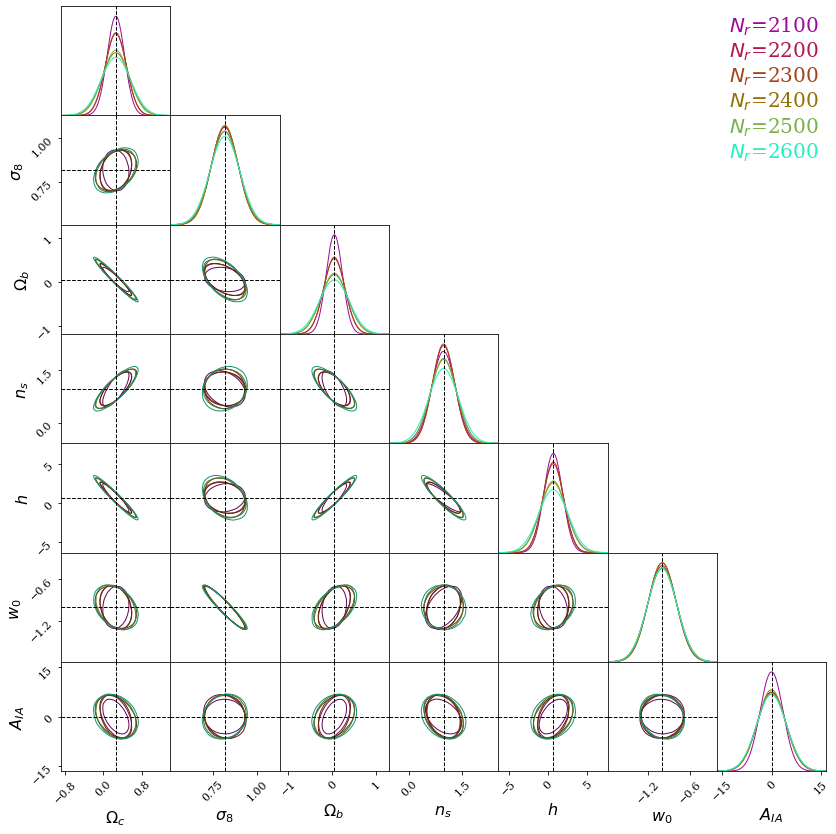

In [8]:

c = ChainConsumer()
##########
c.add_covariance(fid_params , np.linalg.pinv(Fp_1,rcond=1e-9), 
                 parameters=para_names, name="$N_r$=2100")
###########
c.add_covariance(fid_params , np.linalg.pinv(Fp_2,rcond=1e-9), 
                 parameters=para_names, name="$N_r$=2200")
###########
c.add_covariance(fid_params , np.linalg.pinv(Fp_3,rcond=1e-9), 
                 parameters=para_names, name="$N_r$=2300")
###########
c.add_covariance(fid_params , np.linalg.pinv(Fp_4,rcond=1e-9), 
                 parameters=para_names, name="$N_r$=2400")
###########
c.add_covariance(fid_params , np.linalg.pinv(Fp_5,rcond=1e-9), 
                 parameters=para_names, name="$N_r$=2500")
##########
c.add_covariance(fid_params , np.linalg.pinv(Fp_6,rcond=1e-9), 
                 parameters=para_names, name="$N_r$=2600")

c.configure(usetex=False, legend_kwargs={'fontsize': 20}, max_ticks=3,tick_font_size=11, label_font_size=16,sigmas=[0,1],spacing=0.0,cmap=col)
fig = c.plotter.plot(truth=fid_params)
fig.set_size_inches(2 + fig.get_size_inches())
#plt.savefig('../../figures/Fisher_stability_ps.pdf')


In [9]:
# Computing covariance matrix

cov5=np.cov(tf.reshape(ps,[len(ps),11]), rowvar=False)*f_sky
cov45=np.cov(tf.reshape(ps[:4500],[4500,11]), rowvar=False)*f_sky
cov40=np.cov(tf.reshape(ps[:4000],[4000,11]), rowvar=False)*f_sky
cov35=np.cov(tf.reshape(ps[:3500],[3500,11]), rowvar=False)*f_sky
cov30=np.cov(tf.reshape(ps[:3000],[3000,11]), rowvar=False)*f_sky
cov25=np.cov(tf.reshape(ps[:2500],[2500,11]), rowvar=False)*f_sky
cov20=np.cov(tf.reshape(ps[:2000],[2000,11]), rowvar=False)*f_sky



dmu= ps_jac[:1500,:,:].mean(axis=0)
#5000
Fp_5 = dmu.T @ (np.linalg.inv(cov5)) @ dmu
#4500
Fp_45 = dmu.T @ (np.linalg.inv(cov45)) @ dmu
#4000
Fp_40 = dmu.T @ (np.linalg.inv(cov40)) @ dmu
#3500
Fp_35 = dmu.T @ (np.linalg.inv(cov35)) @ dmu
#3000
Fp_30 = dmu.T @ (np.linalg.inv(cov30)) @ dmu
#2500
Fp_25 = dmu.T @ (np.linalg.inv(cov25)) @ dmu
#2000
Fp_20 = dmu.T @ (np.linalg.inv(cov20)) @ dmu

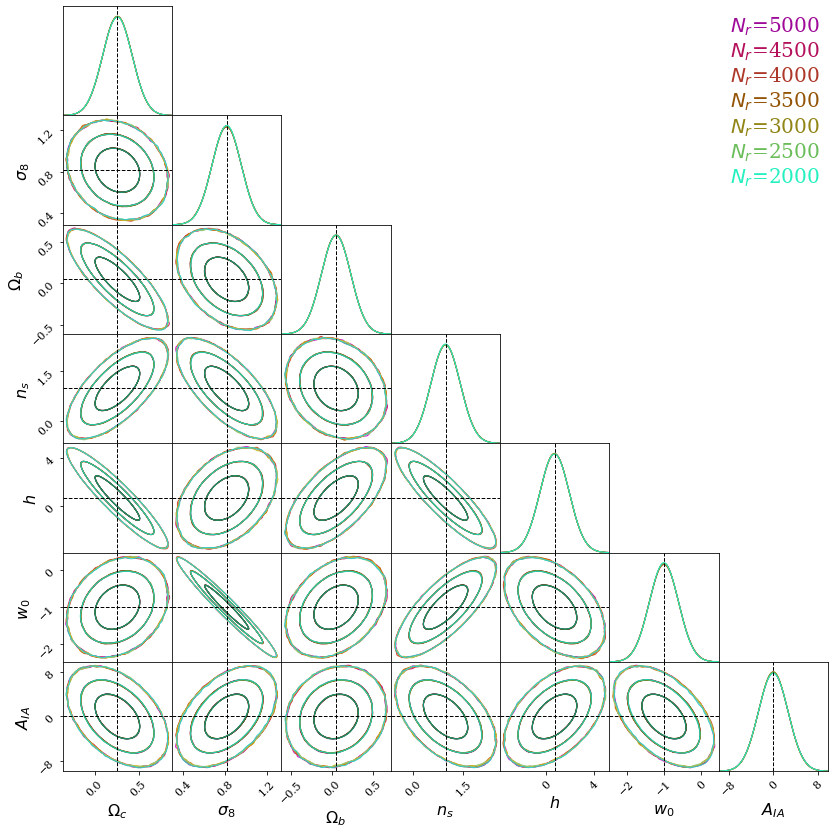

In [10]:
col = cmr.tropical
c = ChainConsumer()
##########
c.add_covariance(fid_params , np.linalg.pinv(Fp_5,rcond=1e-9), 
                 parameters=para_names, name="$N_r$=5000")
##########
c.add_covariance(fid_params , np.linalg.pinv(Fp_45,rcond=1e-9), 
                 parameters=para_names, name="$N_r$=4500")
###########
c.add_covariance(fid_params , np.linalg.pinv(Fp_40,rcond=1e-9), 
                 parameters=para_names, name="$N_r$=4000")
###########
c.add_covariance(fid_params , np.linalg.pinv(Fp_35,rcond=1e-9), 
                 parameters=para_names, name="$N_r$=3500")
###########
c.add_covariance(fid_params , np.linalg.pinv(Fp_30,rcond=1e-9), 
                 parameters=para_names, name="$N_r$=3000")
##########
c.add_covariance(fid_params , np.linalg.pinv(Fp_25,rcond=1e-9), 
                 parameters=para_names, name="$N_r$=2500")
###########
c.add_covariance(fid_params , np.linalg.pinv(Fp_20,rcond=1e-9), 
                 parameters=para_names, name="$N_r$=2000")


c.configure(usetex=False, legend_kwargs={'fontsize': 20}, max_ticks=3,tick_font_size=11, label_font_size=16,sigmas=[0,1, 2,3],spacing=0.0,cmap=col)
fig = c.plotter.plot(truth=fid_params)
fig.set_size_inches(2 + fig.get_size_inches())


## Validate the stability of the Fisher contours for Peak counts

In [11]:
fac_pcounts_5=np.sqrt(np.diag(np.cov(tf.reshape(pcounts[:,0,:],[len(pcounts),8]), rowvar=False)*f_sky))
fac_pcounts_6=np.sqrt(np.diag(np.cov(tf.reshape(pcounts[:,1,:],[len(pcounts),8]), rowvar=False)*f_sky))
fac_pcounts_7=np.sqrt(np.diag(np.cov(tf.reshape(pcounts[:,2,:],[len(pcounts),8]), rowvar=False)*f_sky))

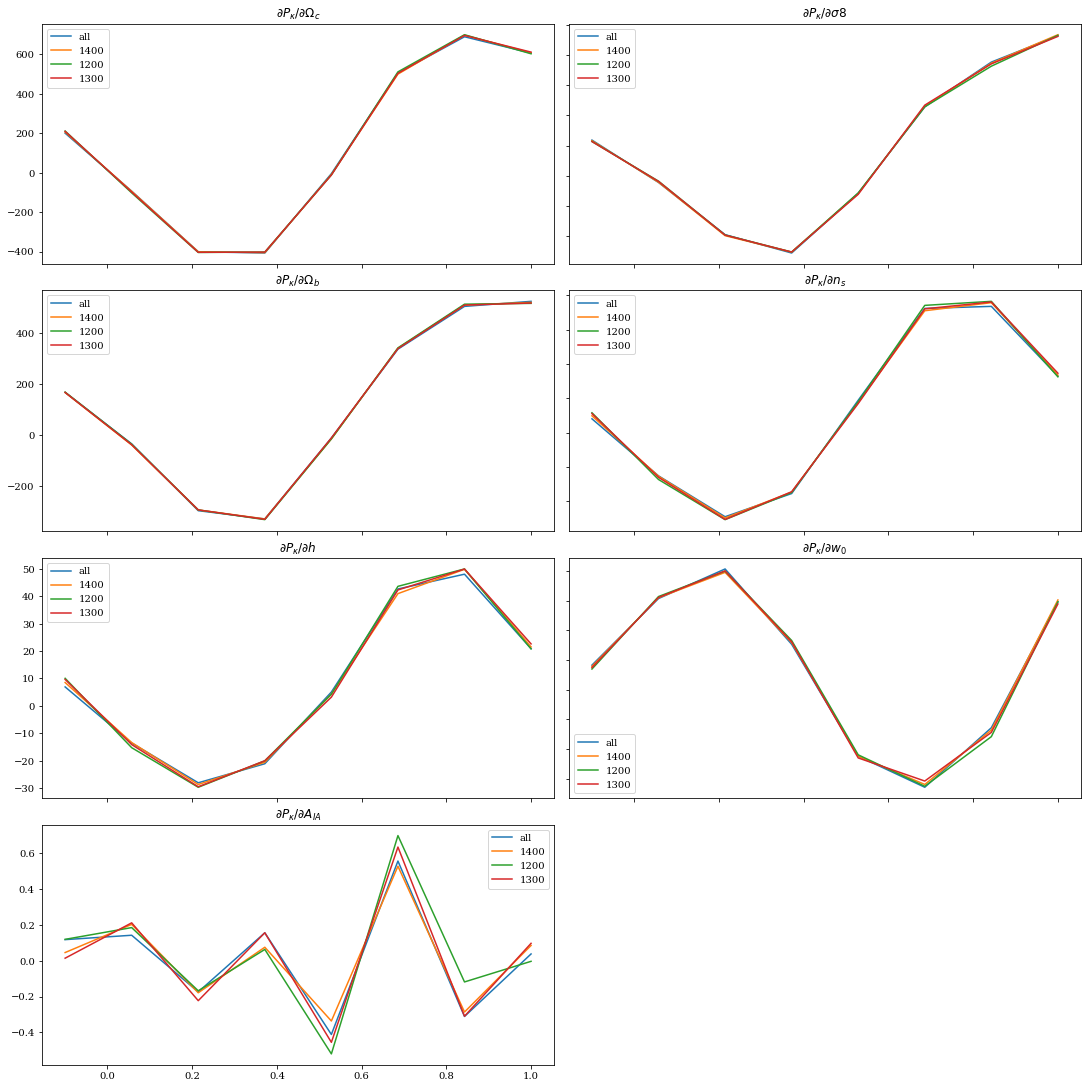

In [12]:
scl=0
figsize = (15, 15)
fig =plt.figure(figsize=figsize, constrained_layout=True)
cols = 2
rows =4
ax = fig.subplots(rows, cols)
for j in range(7):
    ax.flatten()[j].plot(bins,pcounts_jac[:,scl,:,:].mean(axis=0)[...,j]/fac_pcounts_5,label='all')
    ax.flatten()[j].plot(bins,pcounts_jac[:1400,scl,:,:].mean(axis=0)[...,j]/fac_pcounts_5,label='1400')
    ax.flatten()[j].plot(bins,pcounts_jac[:1200,scl,:,:].mean(axis=0)[...,j]/fac_pcounts_5,label='1200')
    ax.flatten()[j].plot(bins,pcounts_jac[:1300,scl,:,:].mean(axis=0)[...,j]/fac_pcounts_5,label='1300')
    ax.flatten()[j].set_title('$\partial P_\kappa/\partial$' +str(labels[j]))
    ax.flatten()[j].legend()
    # Hide x labels and tick labels for top plots and y ticks for right plots.
    ax.flatten()[j].label_outer()
for i in range(7,8):
    ax.flatten()[i].remove()

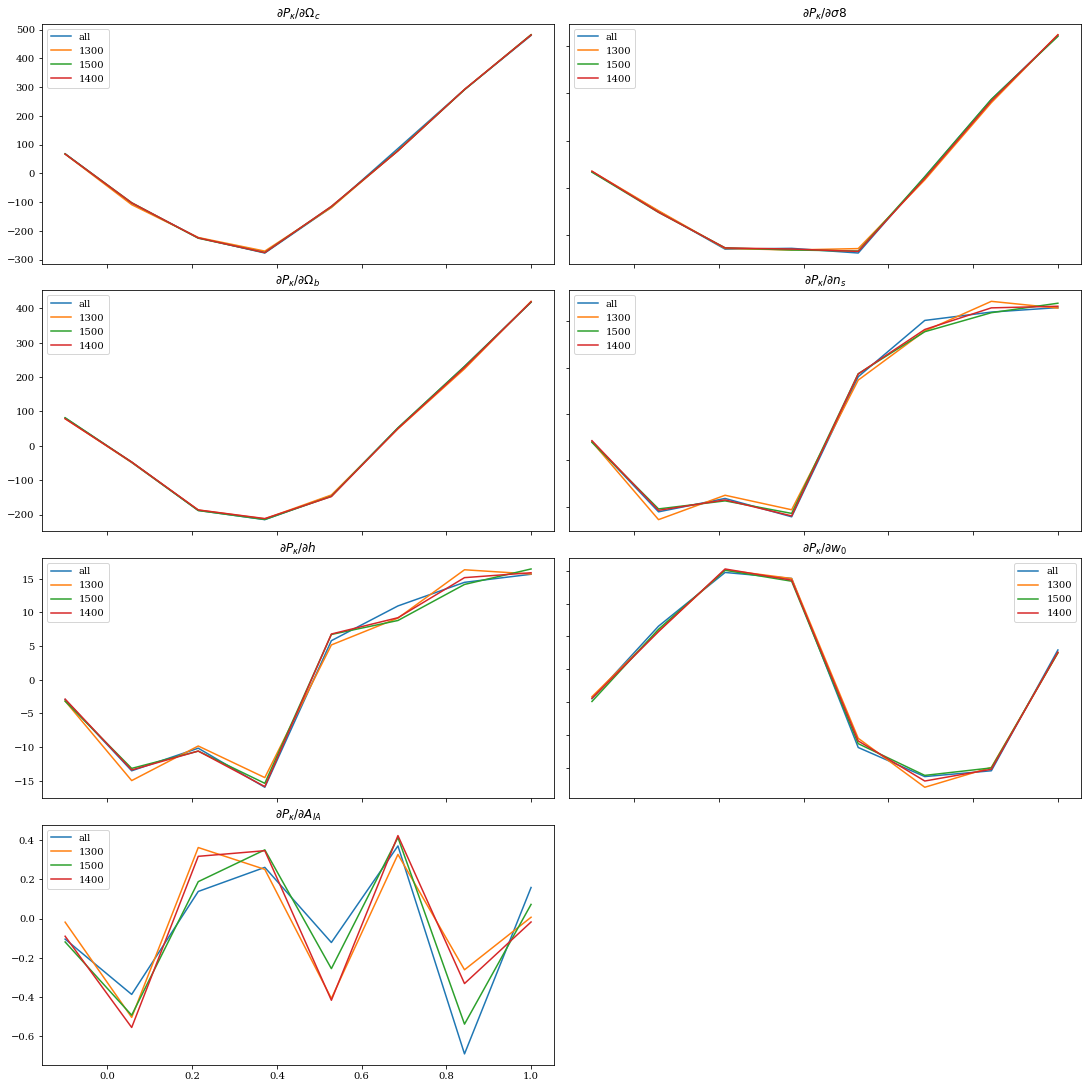

In [13]:
scl=1
figsize = (15, 15)
fig =plt.figure(figsize=figsize, constrained_layout=True)
cols = 2
rows =4
ax = fig.subplots(rows, cols)
for j in range(7):
    ax.flatten()[j].plot(bins,pcounts_jac[:,scl,:,:].mean(axis=0)[...,j]/fac_pcounts_6,label='all')
    ax.flatten()[j].plot(bins,pcounts_jac[:1300,scl,:,:].mean(axis=0)[...,j]/fac_pcounts_6,label='1300')
    ax.flatten()[j].plot(bins,pcounts_jac[:1500,scl,:,:].mean(axis=0)[...,j]/fac_pcounts_6,label='1500')
    ax.flatten()[j].plot(bins,pcounts_jac[:1400,scl,:,:].mean(axis=0)[...,j]/fac_pcounts_6,label='1400')
    ax.flatten()[j].set_title('$\partial P_\kappa/\partial$' +str(labels[j]))
    ax.flatten()[j].legend()
    # Hide x labels and tick labels for top plots and y ticks for right plots.
    ax.flatten()[j].label_outer()
for i in range(7,8):
    ax.flatten()[i].remove()

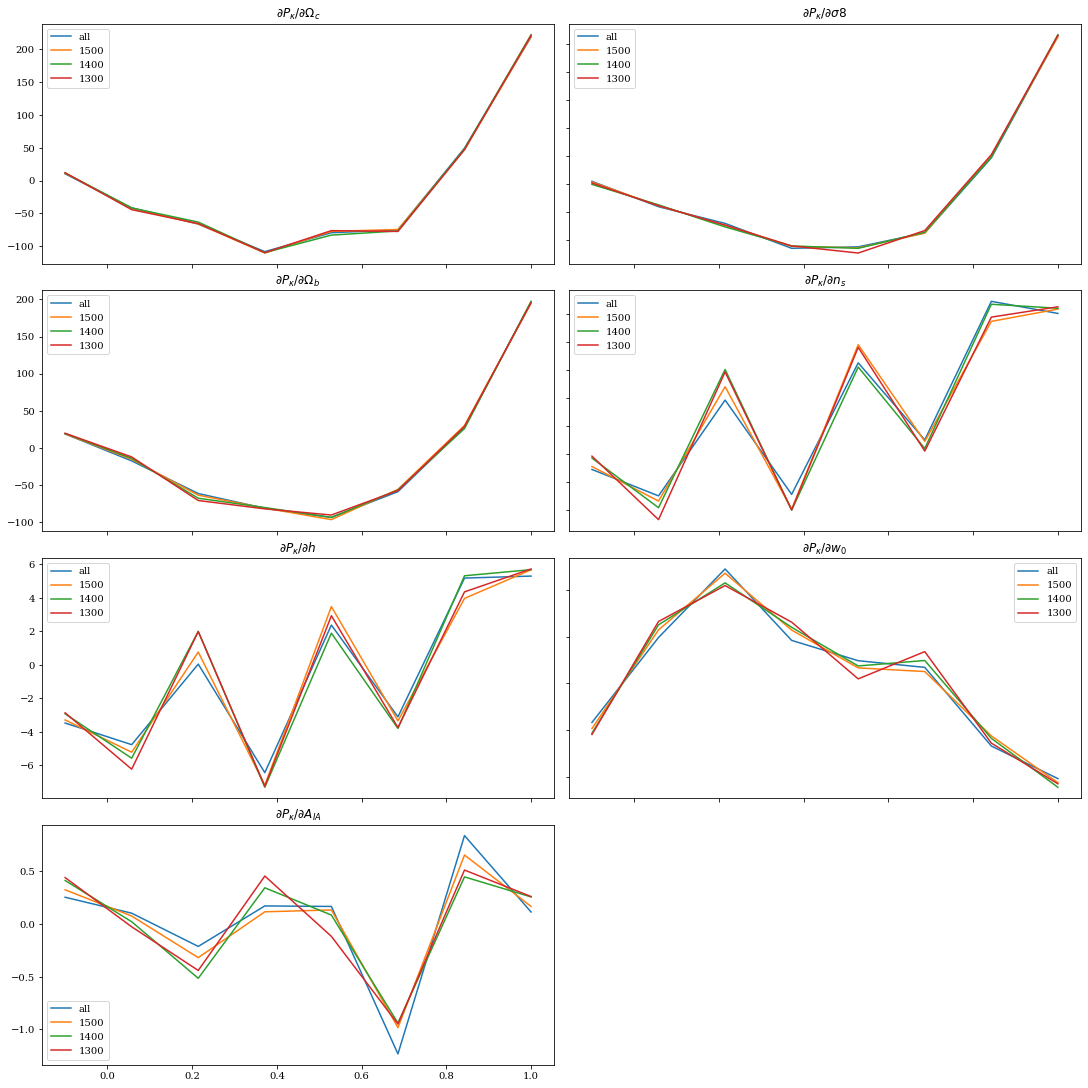

In [14]:
scl=2
figsize = (15, 15)
fig =plt.figure(figsize=figsize, constrained_layout=True)
cols = 2
rows =4
ax = fig.subplots(rows, cols)
for j in range(7):
    ax.flatten()[j].plot(bins,pcounts_jac[:,scl,:,:].mean(axis=0)[...,j]/fac_pcounts_7,label='all')
    ax.flatten()[j].plot(bins,pcounts_jac[:1500,scl,:,:].mean(axis=0)[...,j]/fac_pcounts_7,label='1500')
    ax.flatten()[j].plot(bins,pcounts_jac[:1400,scl,:,:].mean(axis=0)[...,j]/fac_pcounts_7,label='1400')
    ax.flatten()[j].plot(bins,pcounts_jac[:1300,scl,:,:].mean(axis=0)[...,j]/fac_pcounts_7,label='1300')
    ax.flatten()[j].set_title('$\partial P_\kappa/\partial$' +str(labels[j]))
    ax.flatten()[j].legend()
    # Hide x labels and tick labels for top plots and y ticks for right plots.
    ax.flatten()[j].label_outer()
for i in range(7,8):
    ax.flatten()[i].remove()

In [15]:
# Computing covariance matrix

cov=np.cov(tf.reshape(pcounts[:,:,:],[len(pcounts),24]), rowvar=False)*f_sky

# #1600
# dmu = tf.reshape(pcounts_jac[:,:,:,:],[len(pcounts_jac),24,7]).numpy().mean(axis=0)
# Fp = dmu.T @ (np.linalg.inv(cov)) @ dmu

#1500
dmu_5 = tf.reshape(pcounts_jac[:1500,:,:,:],[1500,24,7]).numpy().mean(axis=0)
Fp_5 = dmu_5.T @ (np.linalg.inv(cov)) @ dmu_5

#1400
dmu_4 = tf.reshape(pcounts_jac[:1400,:,:,:],[1400,24,7]).numpy().mean(axis=0)
Fp_4 = dmu_4.T @ (np.linalg.inv(cov)) @ dmu_4

#1300
dmu_3 = tf.reshape(pcounts_jac[:1300,:,:,:],[1300,24,7]).numpy().mean(axis=0)
Fp_3 = dmu_3.T @ (np.linalg.inv(cov)) @ dmu_3


#1200
dmu_2 = tf.reshape(pcounts_jac[:1200,:,:,:],[1200,24,7]).numpy().mean(axis=0)
Fp_2 = dmu_2.T @ (np.linalg.inv(cov)) @ dmu_2


#1100
dmu_1 = tf.reshape(pcounts_jac[:1100,:,:,:],[1100,24,7]).numpy().mean(axis=0)
Fp_1 = dmu_1.T @ (np.linalg.inv(cov)) @ dmu_1

#1000
dmu_0 = tf.reshape(pcounts_jac[:1000,:,:,:],[1000,24,7]).numpy().mean(axis=0)
Fp_0 = dmu_0.T @ (np.linalg.inv(cov)) @ dmu_0

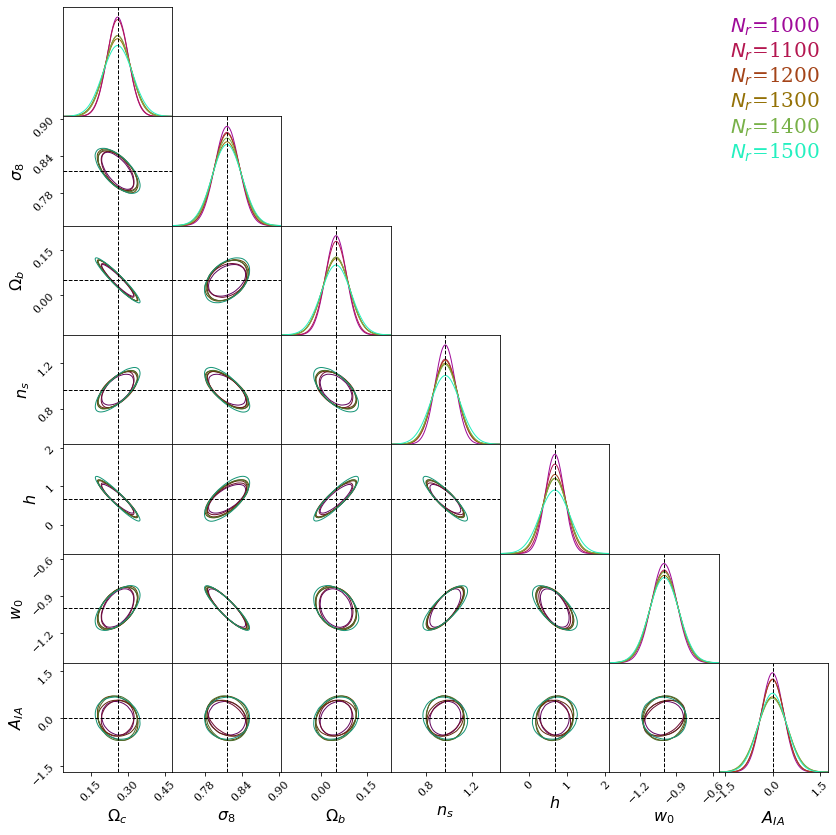

In [16]:
col = cmr.tropical
c = ChainConsumer()
##########
c.add_covariance(fid_params , np.linalg.pinv(Fp_0,rcond=1e-9), 
                 parameters=para_names, name="$N_r$=1000")
##########
c.add_covariance(fid_params , np.linalg.pinv(Fp_1,rcond=1e-9), 
                 parameters=para_names, name="$N_r$=1100")
###########
c.add_covariance(fid_params , np.linalg.pinv(Fp_2,rcond=1e-9), 
                 parameters=para_names, name="$N_r$=1200")
###########
c.add_covariance(fid_params , np.linalg.pinv(Fp_3,rcond=1e-9), 
                 parameters=para_names, name="$N_r$=1300")
###########
c.add_covariance(fid_params , np.linalg.pinv(Fp_4,rcond=1e-9), 
                 parameters=para_names, name="$N_r$=1400")
###########
c.add_covariance(fid_params , np.linalg.pinv(Fp_5,rcond=1e-9), 
                 parameters=para_names, name="$N_r$=1500")
c.configure(usetex=False, legend_kwargs={'fontsize': 20}, max_ticks=3,tick_font_size=11, label_font_size=16,sigmas=[0,1],spacing=0.0,cmap=col)
fig = c.plotter.plot(truth=fid_params)
fig.set_size_inches(2 + fig.get_size_inches())
#plt.savefig('../../figures/Fisher_stability_peak_1sigma.pdf')


In [17]:
# Computing covariance matrix
cov5=np.cov(tf.reshape(pcounts[:5000,:,:],[len(pcounts),24]), rowvar=False)*f_sky
cov45=np.cov(tf.reshape(pcounts[:4500,:,:],[4500,24]), rowvar=False)*f_sky
cov40=np.cov(tf.reshape(pcounts[:4000,:,:],[4000,24]), rowvar=False)*f_sky
cov35=np.cov(tf.reshape(pcounts[:3500,:,:],[3500,24]), rowvar=False)*f_sky
cov30=np.cov(tf.reshape(pcounts[:3000,:,:],[3000,24]), rowvar=False)*f_sky
cov25=np.cov(tf.reshape(pcounts[:2500,:,:],[2500,24]), rowvar=False)*f_sky
cov20=np.cov(tf.reshape(pcounts[:2000,:,:],[2000,24]), rowvar=False)*f_sky


dmu = tf.reshape(pcounts_jac[:1500,:,:,:],[1500,24,7]).numpy().mean(axis=0)
#5000
Fp_5 = dmu.T @ (np.linalg.inv(cov5)) @ dmu
#4500
Fp_45 = dmu.T @ (np.linalg.inv(cov45)) @ dmu
#4000
Fp_40 = dmu.T @ (np.linalg.inv(cov40)) @ dmu
#3500
Fp_35 = dmu.T @ (np.linalg.inv(cov35)) @ dmu
#3000
Fp_30 = dmu.T @ (np.linalg.inv(cov30)) @ dmu
#2500
Fp_25 = dmu.T @ (np.linalg.inv(cov25)) @ dmu
#2000
Fp_20 = dmu.T @ (np.linalg.inv(cov20)) @ dmu

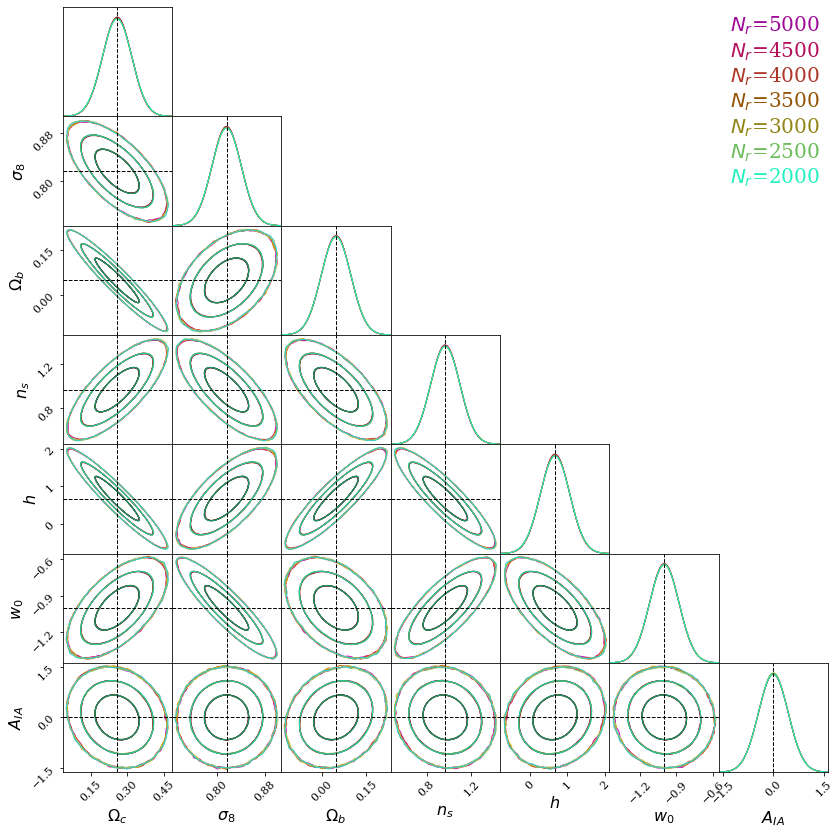

In [18]:
col = cmr.tropical
c = ChainConsumer()
##########
c.add_covariance(fid_params , np.linalg.pinv(Fp_5,rcond=1e-9), 
                 parameters=para_names, name="$N_r$=5000")
##########
c.add_covariance(fid_params , np.linalg.pinv(Fp_45,rcond=1e-9), 
                 parameters=para_names, name="$N_r$=4500")
###########
c.add_covariance(fid_params , np.linalg.pinv(Fp_40,rcond=1e-9), 
                 parameters=para_names, name="$N_r$=4000")
###########
c.add_covariance(fid_params , np.linalg.pinv(Fp_35,rcond=1e-9), 
                 parameters=para_names, name="$N_r$=3500")
###########
c.add_covariance(fid_params , np.linalg.pinv(Fp_30,rcond=1e-9), 
                 parameters=para_names, name="$N_r$=3000")
##########
c.add_covariance(fid_params , np.linalg.pinv(Fp_25,rcond=1e-9), 
                 parameters=para_names, name="$N_r$=2500")
###########
c.add_covariance(fid_params , np.linalg.pinv(Fp_20,rcond=1e-9), 
                 parameters=para_names, name="$N_r$=2000")


c.configure(usetex=False, legend_kwargs={'fontsize': 20}, max_ticks=3,tick_font_size=11, label_font_size=16,sigmas=[0,1, 2,3],spacing=0.0,cmap=col)
fig = c.plotter.plot(truth=fid_params)
fig.set_size_inches(2 + fig.get_size_inches())
#plt.savefig('../../figures/Fisher_stability_peak.pdf')
